# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

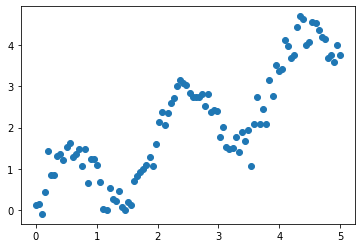

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5377379083754508


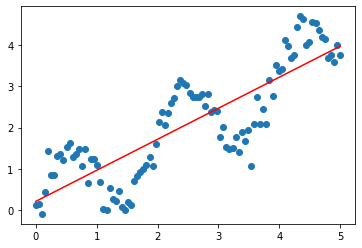

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

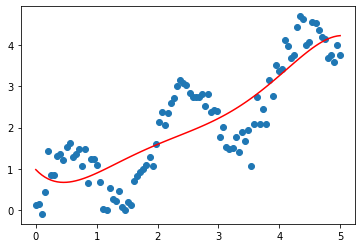

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.54603346  2.36938966 -1.13394491  0.24393036 -0.01886945]
interception:  0.9815967979806592


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.9815968 , 0.90941354, 0.84846332, 0.79792584, 0.75701743,
       0.72499025, 0.7011316 , 0.68476313, 0.67524014, 0.67195078,
       0.67431536, 0.68178559, 0.69384381, 0.71000227, 0.72980239,
       0.752814  , 0.77863462, 0.80688867, 0.83722679, 0.86932502,
       0.90288414, 0.93762885, 0.97330708, 1.00968922, 1.04656737,
       1.08375461, 1.12108428, 1.15840916, 1.19560082, 1.2325488 ,
       1.26915992, 1.30535749, 1.34108061, 1.37628338, 1.4109342 ,
       1.445015  , 1.4785205 , 1.51145746, 1.54384397, 1.57570866,
       1.60708997, 1.63803543, 1.66860089, 1.69884976, 1.72885234,
       1.75868498, 1.7884294 , 1.81817193, 1.84800276, 1.87801519,
       1.9083049 , 1.93896922, 1.97010633, 2.0018146 , 2.03419174,
       2.06733417, 2.10133619, 2.13628928, 2.17228133, 2.20939591,
       2.24771154, 2.28730092, 2.32823018, 2.37055819, 2.41433574,
       2.45960486, 2.50639803, 2.55473747, 2.60463438, 2.6560882 ,
       2.70908584, 2.763601  , 2.81959335, 2.87700784, 2.93577

In [15]:
regr_poly.predict(X_poly)

array([0.9815968 , 0.90941354, 0.84846332, 0.79792584, 0.75701743,
       0.72499025, 0.7011316 , 0.68476313, 0.67524014, 0.67195078,
       0.67431536, 0.68178559, 0.69384381, 0.71000227, 0.72980239,
       0.752814  , 0.77863462, 0.80688867, 0.83722679, 0.86932502,
       0.90288414, 0.93762885, 0.97330708, 1.00968922, 1.04656737,
       1.08375461, 1.12108428, 1.15840916, 1.19560082, 1.2325488 ,
       1.26915992, 1.30535749, 1.34108061, 1.37628338, 1.4109342 ,
       1.445015  , 1.4785205 , 1.51145746, 1.54384397, 1.57570866,
       1.60708997, 1.63803543, 1.66860089, 1.69884976, 1.72885234,
       1.75868498, 1.7884294 , 1.81817193, 1.84800276, 1.87801519,
       1.9083049 , 1.93896922, 1.97010633, 2.0018146 , 2.03419174,
       2.06733417, 2.10133619, 2.13628928, 2.17228133, 2.20939591,
       2.24771154, 2.28730092, 2.32823018, 2.37055819, 2.41433574,
       2.45960486, 2.50639803, 2.55473747, 2.60463438, 2.6560882 ,
       2.70908584, 2.763601  , 2.81959335, 2.87700784, 2.93577

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

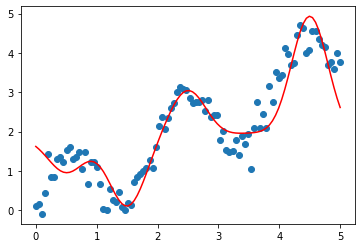

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.88002791 -1.7362472   1.20834947  0.10528097  3.09026119]
interception:  1.8412901043437198


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

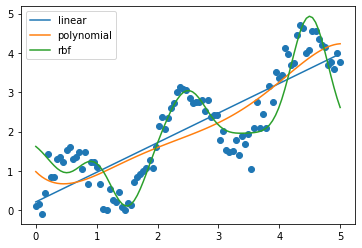

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5377379083754508


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.48924813662723116


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2564651466727359
